# Analysis notebook:

Manuscript: AF2χ: predicting protein side-chain rotamer distributions with AlphaFold2

Authors: Matteo Cagiada / F. Emil Thomasen

This notebook covers data and analysis for manuscript figures and tables:

- Fig S12
- Fig S13

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## AF2chi computational perfomance on MDatlas sims

In [2]:
stats_mdatlas=pd.read_csv('../data/extra_data/ATLAS_perfs.csv')

In [3]:
seconds_per_day = 24 * 60 * 60  # Total seconds in a day

stats_mdatlas['rep_time_secs'] = seconds_per_day / stats_mdatlas['ns/day'] * 300

sum_scaled_times = stats_mdatlas.groupby('pdb_id')['rep_time_secs'].sum().reset_index()
sum_scaled_times.rename(columns={'rep_time_secs': 'total_time_secs'}, inplace=True)

stats_mdatlas = stats_mdatlas.merge(sum_scaled_times, on='pdb_id')


In [4]:
stats_mdatlas_unique=stats_mdatlas.query('rep == 1')

In [5]:
stats_af2chi=pd.read_csv('../data/extra_data/MDatlas_af2chis_stats.txt',delim_whitespace=True)

/var/folders/8w/2dqxrgsd4vj00wv819dcz51w0000gn/T/ipykernel_2237/3530853679.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  stats_af2chi=pd.read_csv('../data/extra_data/MDatlas_af2chis_stats.txt',delim_whitespace=True)


In [6]:
stats_mdatlas_unique['Clean_pdbid'] = stats_mdatlas_unique['pdb_id'].str[:-2] # Extract part before "_"


/var/folders/8w/2dqxrgsd4vj00wv819dcz51w0000gn/T/ipykernel_2237/3286663325.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats_mdatlas_unique['Clean_pdbid'] = stats_mdatlas_unique['pdb_id'].str[:-2] # Extract part before "_"


In [7]:
merged_df = pd.merge(stats_af2chi, stats_mdatlas_unique, left_on='pdbid', right_on='Clean_pdbid', how='inner')
merged_df = merged_df.drop(columns=['Clean_pdbid','pdb_id','rep'])


In [8]:
# Step 1: Convert ns/day to seconds per ns

In [9]:
merged_df_sorted=merged_df.sort_values(by='lenght')

In [10]:
merged_df_sorted['af2chi_time']=merged_df_sorted['distr_time']+merged_df_sorted['ensemble_time']

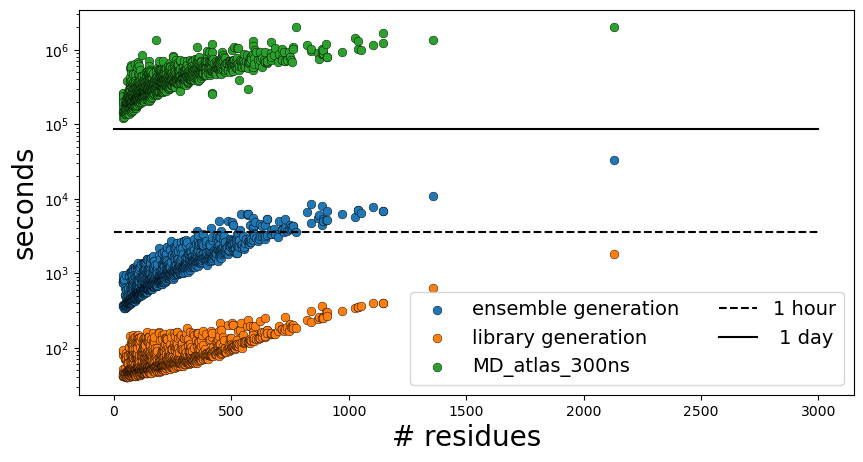

In [11]:
### Fig S13 
fig,ax =plt.subplots(1,1,figsize=(10,5))

ax.scatter(merged_df_sorted['lenght'],merged_df_sorted['af2chi_time'],label='ensemble generation',edgecolor='k',s=40,lw=0.3)
ax.scatter(merged_df_sorted['lenght'],merged_df_sorted['distr_time'],label='library generation',edgecolor='k',s=40,lw=0.3)
ax.scatter(merged_df_sorted['lenght'],merged_df_sorted['total_time_secs'],label='MD_atlas_300ns',edgecolor='k',s=40,lw=0.3)

ax.plot([0,3000],[60*60,60*60],'k--',label='1 hour')
ax.plot([0,3000],[60*60*24,60*60*24],color='k',label=' 1 day')

ax.set_yscale('log')
ax.set_ylabel('seconds',fontsize=20)
ax.set_xlabel('# residues',fontsize=20)
ax.legend(fontsize=14,ncol=2)

plt.savefig('../Figures/MDatlas_comparison_perfomance.pdf')

## af2chi js comparison mdatlas

In [12]:
data_mdatlas=pd.read_csv('../data/extra_data/af2chi_acc_MDatlas_monomers.csv')

<BarContainer object of 19 artists>

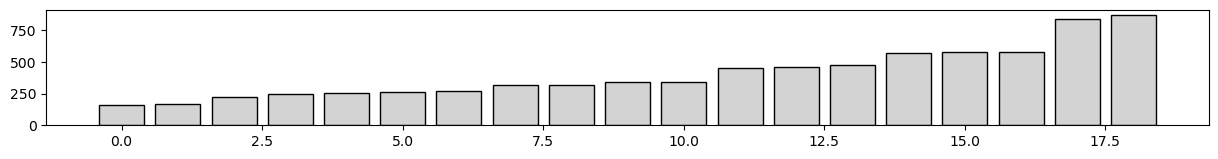

In [13]:
# Create the figure
fig, ax = plt.subplots(1,1, figsize=(15,1.5))

# X positions based on unique names
x_positions = np.arange(len(data_mdatlas))
ax.bar(x_positions, data_mdatlas['size'],color='lightgray',edgecolor='k')
#plt.savefig('../Figures/MDatlas_comparison_gen_model_size_plot.pdf')

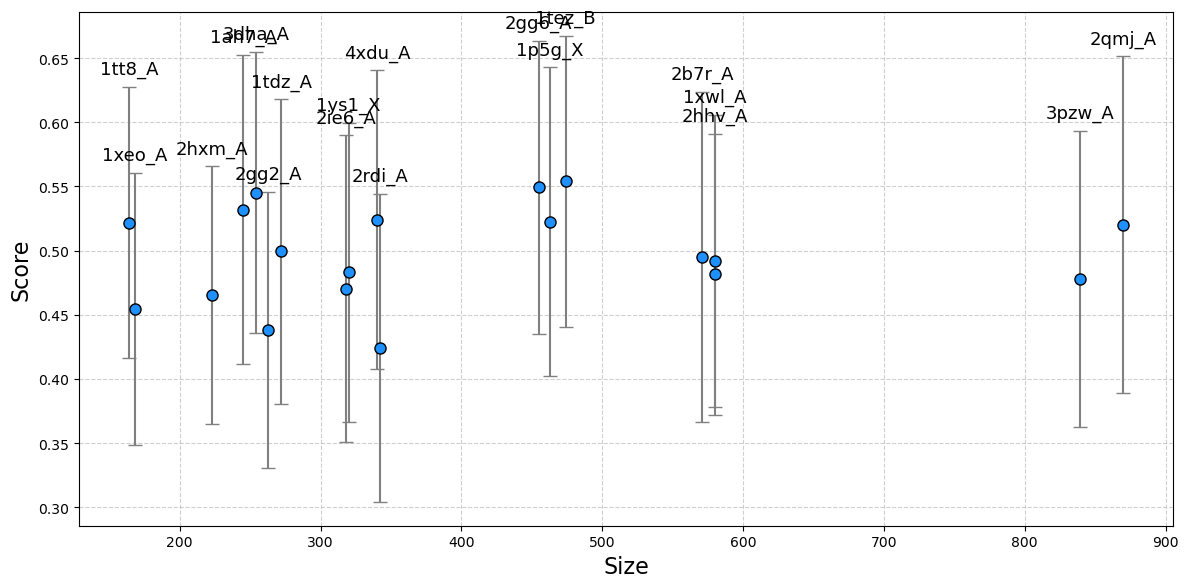

In [14]:
### Fig S12
# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Scatter plot with error bars
ax.errorbar(
    data_mdatlas['size'], data_mdatlas['mean_af2chi'], yerr=data_mdatlas['std_af2chi'],
    fmt='o', ecolor='gray', elinewidth=1.5, capsize=5,
    markersize=8, markerfacecolor='dodgerblue', markeredgecolor='black',
    linestyle='None'
)

# Add labels to each point
for i, row in data_mdatlas.iterrows():
    ax.text(
        row['size'], row['mean_af2chi'] + row['std_af2chi'] + 0.01,
        row['pdb_file'], ha='center', fontsize=13
    )

# Axis labels and title
ax.set_xlabel('Size', fontsize=16)
ax.set_ylabel('Score', fontsize=16)

# Grid and layout
ax.grid(True, linestyle='--', alpha=0.6)
fig.tight_layout()
plt.savefig('../figures/MDatlas_af2chi_vs_size.pdf')